## Mixed Effects Model

In [11]:
import os
import pandas as pd

current_dir = os.getcwd()
file_path = os.path.join(current_dir, "Cleaned_Datasets", "task_cleaned.csv")
df = pd.read_csv(file_path)
print(df.head())

   Participant_ID Condition      Context     Product  Payment  Intent  Value  \
0        13397789      both      hedonic   chocolate     20.0       2      3   
1        13397789      both      hedonic  headphones     95.0       4      4   
2        13397789      both  utilitarian   chocolate     20.0       3      3   
3        13397789      both  utilitarian  headphones     68.0       2      4   
4        13397990  scarcity      hedonic   chocolate     25.0       2      3   

   Trust  
0      5  
1      5  
2      4  
3      5  
4      3  


### 1. EDA

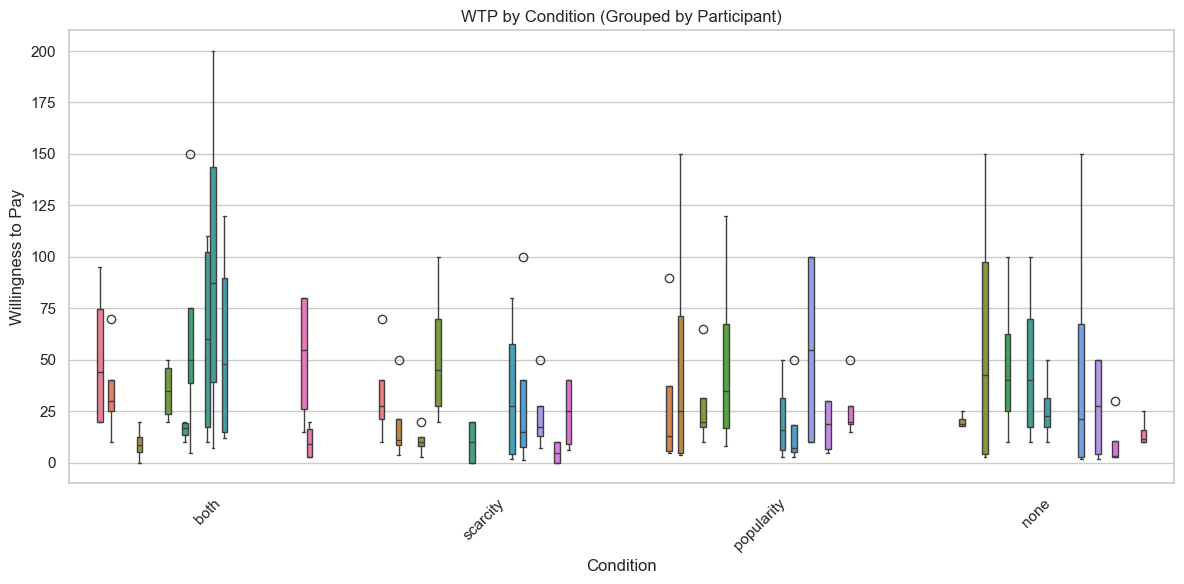

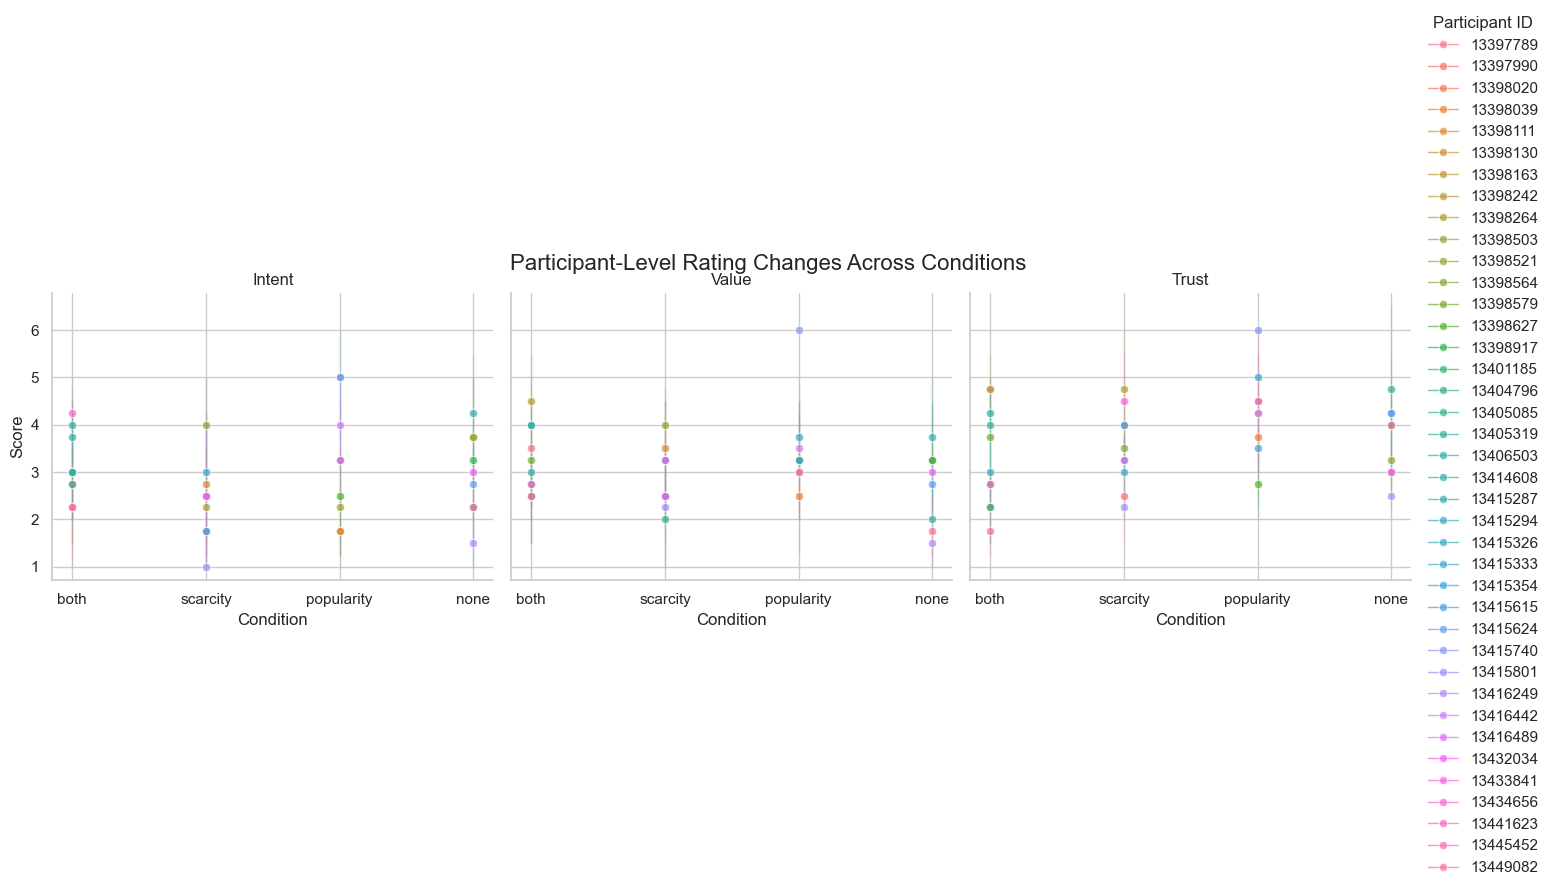

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Participant_ID is treated as a category
df["Participant_ID"] = df["Participant_ID"].astype(str)

# Set seaborn style
sns.set(style="whitegrid")

# Plot 1: Boxplot of WTP by Condition, grouped by Participant_ID
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Condition", y="Payment", hue="Participant_ID", dodge=True)
plt.title("WTP by Condition (Grouped by Participant)")
plt.ylabel("Willingness to Pay")
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # hide legend for clarity
plt.tight_layout()
plt.show()

# Prepare data in long format for multi-line participant-level visualization
df_long = df.melt(
    id_vars=["Participant_ID", "Condition"],
    value_vars=["Intent", "Value", "Trust"],
    var_name="Rating_Type",
    value_name="Score"
)

# Convert Participant_ID to string again in case melt reset the dtype
df_long["Participant_ID"] = df_long["Participant_ID"].astype(str)

# Lineplot: Individual trajectories per participant across conditions
g = sns.FacetGrid(df_long, col="Rating_Type", col_wrap=3, height=4, aspect=1.2)
g.map_dataframe(
    sns.lineplot,
    x="Condition", y="Score", hue="Participant_ID",
    marker="o", alpha=0.7, linewidth=1
)
g.set_titles("{col_name}")
g.set_axis_labels("Condition", "Score")
g.add_legend(title="Participant ID")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Participant-Level Rating Changes Across Conditions", fontsize=16)
plt.show()


In [14]:
import pandas as pd
import statsmodels.formula.api as smf
# Mixed models with full fixed effects
model_payment = smf.mixedlm("Payment ~ Condition + Context + Product", data=df, groups=df["Participant_ID"]).fit()
model_intent = smf.mixedlm("Intent ~ Condition + Context + Product", data=df, groups=df["Participant_ID"]).fit()
model_value = smf.mixedlm("Value ~ Condition + Context + Product", data=df, groups=df["Participant_ID"]).fit()
model_trust = smf.mixedlm("Trust ~ Condition + Context + Product", data=df, groups=df["Participant_ID"]).fit()

# Print results
print(model_payment.summary())
print(model_intent.summary())
print(model_value.summary())
print(model_trust.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     Payment  
No. Observations:      156         Method:                 REML     
No. Groups:            39          Scale:                  686.0584 
Min. group size:       4           Log-Likelihood:         -727.1242
Max. group size:       4           Converged:              Yes      
Mean group size:       4.0                                          
--------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept                30.586    6.517  4.693 0.000  17.812 43.360
Condition[T.none]       -10.533    8.651 -1.217 0.223 -27.489  6.423
Condition[T.popularity] -10.991    8.651 -1.270 0.204 -27.948  5.965
Condition[T.scarcity]   -19.465    8.410 -2.314 0.021 -35.948 -2.981
Context[T.utilitarian]  -16.744    4.194 -3.992 0.